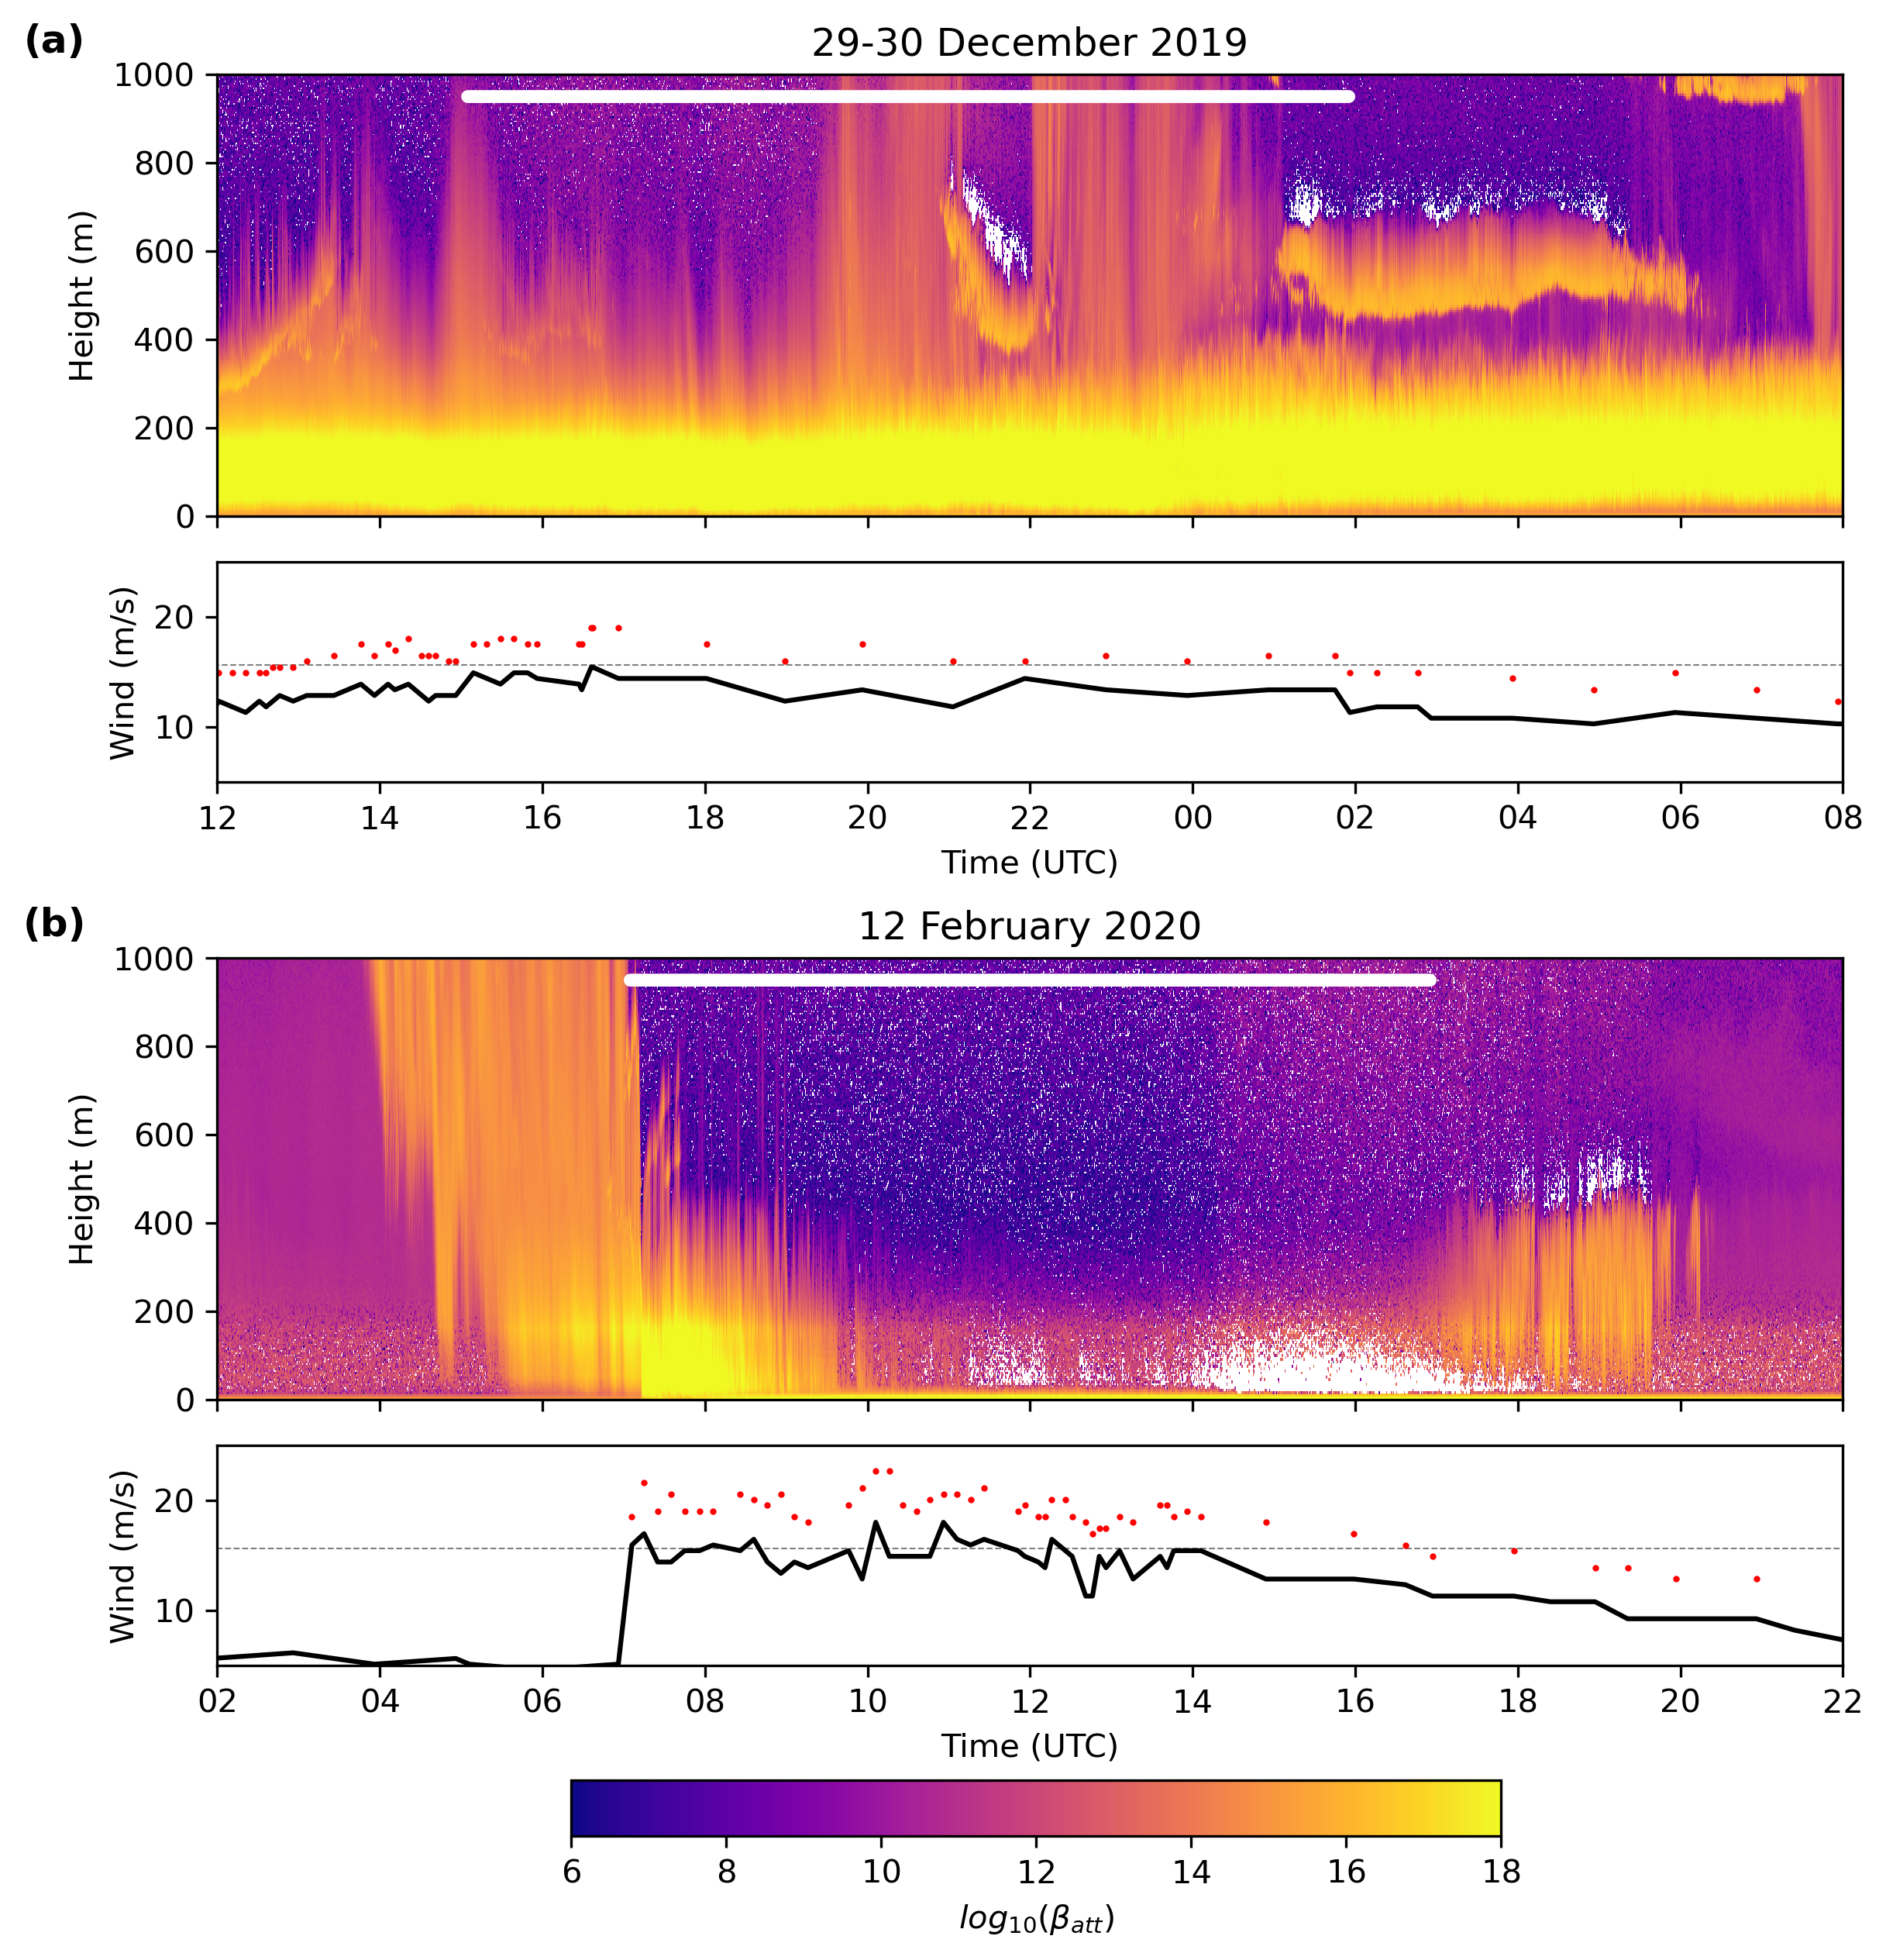

In [69]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Parse dates from .csv file, knowing their format as a string and convert to datetime

#Process station data
RDRdata19= pd.read_csv('data/KRDR_122919.dat',na_values='M')
time19=[dt.datetime.strptime(x, '%Y-%m-%d %H:%M') for x in RDRdata19['valid']]
RDRdata20 = pd.read_csv('data/KRDR_021220.dat',na_values='M')
time20=[dt.datetime.strptime(x, '%Y-%m-%d %H:%M') for x in RDRdata20['valid']]

datafile = 'data/20191229_Emerado.nc'
DS = xr.open_dataset(datafile)
data = DS.beta_raw
data = data.transpose()
data = np.log(data)
data_122919 = data.sortby(data.time)

datafile = 'data/20191230_Emerado.nc'
DS = xr.open_dataset(datafile)
data = DS.beta_raw
data = data.transpose()
data = np.log(data)
data_123019 = data.sortby(data.time)

data_dec2019=xr.concat([data_122919,data_123019],dim='time')

datafile = 'data/20200212_Emerado.nc'
DS = xr.open_dataset(datafile)
data = DS.beta_raw
data = data.transpose()
data = np.log(data)
data_021220 = data.sortby(data.time)

#CREATE the Figure
fig=plt.figure(figsize=(8,8),dpi=300,facecolor='white',constrained_layout=True)
heights = [3, 1.5, 3, 1.5,0.5]
spec = fig.add_gridspec(ncols=1, nrows=5,height_ratios=heights)
ax1 = fig.add_subplot(spec[0,0]) 
dec29 = data_dec2019.plot(cmap='plasma',vmin=6, vmax=18,add_colorbar=False)
plt.xlim(left=dt.datetime(2019, 12, 29, hour=12),right=dt.datetime(2019, 12, 30, hour=8))
ax1.annotate("",xy=(0.15, 0.95), xycoords='axes fraction',xytext=(0.7, 0.95), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="-",connectionstyle="arc3, rad=0",color="white",lw=4))

plt.xlabel('')
ax1.axes.xaxis.set_ticklabels([])
plt.ylim(0, 1000)
plt.ylabel('Height (m)')
plt.xlabel('')
plt.title('29-30 December 2019')
ax1.text(-.1, 1.05,'(a)',horizontalalignment='center',fontsize=12,transform=ax1.transAxes,weight='bold')

ax2 = fig.add_subplot(spec[1,0])
bliz29 = plt.plot([time19[0],time19[100]],[15.6464,15.6464],color='grey',linestyle='dashed',linewidth=0.5)
dec29rdr = plt.plot(time19,RDRdata19['sknt']*0.514444,color='black')
dec29rdrg = plt.plot(time19,RDRdata19['gust']*0.514444,'ro', markersize=1)
plt.xlim(left=dt.datetime(2019, 12, 29, hour=12),right=dt.datetime(2019, 12, 30, hour=8))
plt.ylim(5,25)
plt.xlabel('Time (UTC)')
plt.ylabel('Wind (m/s)')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H'),)
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_horizontalalignment('center')
plt.xticks(rotation=0)


ax3 = fig.add_subplot(spec[2,0]) 
feb12 = data_021220.plot(cmap='plasma',vmin=6, vmax=18,add_colorbar=False)
plt.xlim(left=dt.datetime(2020, 2, 12, hour=2),right=dt.datetime(2020, 2, 12, hour=22))
ax3.annotate("",xy=(0.25, 0.95), xycoords='axes fraction',xytext=(0.75, 0.95), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="-",connectionstyle="arc3, rad=0",color="white",lw=4))
plt.xlabel('')
plt.ylim(0, 1000)
plt.ylabel('Height (m)')
ax3.axes.xaxis.set_ticklabels([])
plt.title('12 February 2020')
ax3.text(-0.1, 1.05,'(b)',horizontalalignment='center',fontsize=12,transform=ax3.transAxes,weight='bold')


ax4 = fig.add_subplot(spec[3,0]) 
bliz12 = plt.plot([time20[0],time20[63]],[15.6464,15.6464],color='grey',linestyle='dashed',linewidth=0.5)
rdr12dow = plt.plot(time20,RDRdata20['sknt']*0.514444,color='black')
rdr12dowg = plt.plot(time20,RDRdata20['gust']*0.514444,'ro', markersize=1)
plt.xlim(left=dt.datetime(2020, 2, 12, hour=2),right=dt.datetime(2020, 2, 12, hour=22))
plt.ylim(5,25)
plt.xlabel('Time (UTC)')
plt.ylabel('Wind (m/s)')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%H'),)
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_horizontalalignment('center')
plt.xticks(rotation=0)

#ax5 = fig.add_subplot(spec[4,0]) 
cbar_ax = fig.add_axes([0.3, 0.02, 0.5, 0.03])
#Probably a better way to do this, but I wanted the colorbar to be 1/2 width. 
cbar = fig.colorbar(feb12, cax=cbar_ax,orientation='horizontal')
cbar.set_label(r'$log_{10}(\beta_{att})$')
plt.savefig('BAMS_ceilometer_KRDR.png',bbox_inches='tight')
plt.show()


In [47]:
RDRdata20

,station,valid,tmpc,relh,sknt,gust
0,RDR,2020-02-12 00:56,-1.78,77.97,11.0,NaN
1,RDR,2020-02-12 01:56,-2.11,78.24,11.0,NaN
2,RDR,2020-02-12 02:56,-1.72,77.00,12.0,NaN
3,RDR,2020-02-12 03:56,-1.39,77.05,10.0,NaN
4,RDR,2020-02-12 04:56,-0.89,77.78,11.0,NaN
...,...,...,...,...,...,...
59,RDR,2020-02-12 20:56,-24.89,56.18,18.0,25.0
60,RDR,2020-02-12 21:24,-25.00,57.35,16.0,NaN
61,RDR,2020-02-12 22:06,-24.72,58.66,14.0,NaN
62,RDR,2020-02-12 22:56,-24.78,59.57,11.0,NaN


In [55]:
time20

[datetime.datetime(2020, 2, 12, 0, 56),
 datetime.datetime(2020, 2, 12, 1, 56),
 datetime.datetime(2020, 2, 12, 2, 56),
 datetime.datetime(2020, 2, 12, 3, 56),
 datetime.datetime(2020, 2, 12, 4, 56),
 datetime.datetime(2020, 2, 12, 5, 6),
 datetime.datetime(2020, 2, 12, 5, 56),
 datetime.datetime(2020, 2, 12, 6, 56),
 datetime.datetime(2020, 2, 12, 7, 6),
 datetime.datetime(2020, 2, 12, 7, 15),
 datetime.datetime(2020, 2, 12, 7, 25),
 datetime.datetime(2020, 2, 12, 7, 35),
 datetime.datetime(2020, 2, 12, 7, 45),
 datetime.datetime(2020, 2, 12, 7, 56),
 datetime.datetime(2020, 2, 12, 8, 6),
 datetime.datetime(2020, 2, 12, 8, 26),
 datetime.datetime(2020, 2, 12, 8, 36),
 datetime.datetime(2020, 2, 12, 8, 46),
 datetime.datetime(2020, 2, 12, 8, 56),
 datetime.datetime(2020, 2, 12, 9, 6),
 datetime.datetime(2020, 2, 12, 9, 16),
 datetime.datetime(2020, 2, 12, 9, 46),
 datetime.datetime(2020, 2, 12, 9, 56),
 datetime.datetime(2020, 2, 12, 10, 6),
 datetime.datetime(2020, 2, 12, 10, 16),
 da